Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import bandwidth
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import reverse_cuthill_mckee as rcm

Matrix Test

In [2]:
# Lendo Dados
matrix_file = open('./matrix/lshp1270.mtx', 'r')
lines = matrix_file.readlines()
matrix_file.close()
i_s, j_s = [], []
for line in lines[13:]:
   i, j, *_ = line.split()
   i, j = int(i) - 1, int(j) - 1
   i_s.append(i)
   j_s.append(j)

# Construindo Matriz Esparsa
n = len(set(i_s))
matrix = lil_matrix((n, n))
for i, j in zip(i_s, j_s):
   matrix[i, j] = True
   matrix[j, i] = True
matrix = matrix.tocsr()

# Liberando Memória
del lines
del i_s
del j_s
del matrix_file

In [3]:
# Gerando Nova Ordem (Algoritmo: Reverse Cuthill McKee)
new_order = rcm(matrix, True)
new_order = new_order.tolist()

In [4]:
# Reordenando Matriz
new_matrix = lil_matrix(matrix.shape)
for i, j in zip(*matrix.nonzero()):
   i = new_order.index(i)
   j = new_order.index(j)
   new_matrix[i, j] = True
new_matrix = new_matrix.tocsr()

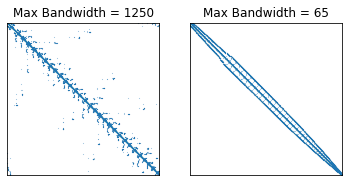

In [5]:
# Exibindo Matrizes Esparsas
fig, ax = plt.subplots(1, 2)
params = {
   'left': False, 
   'top': False, 
   'bottom': False,
   'labelleft': False, 
   'labeltop': False, 
}

bd_1 = bandwidth(matrix.toarray())
title_1 = f'Max Bandwidth = {bd_1[0]}'
ax[0].set_title(title_1)
ax[0].spy(matrix, markersize=0.1)
ax[0].tick_params(**params)

bd_2 = bandwidth(new_matrix.toarray())
title_2 = f'Max Bandwidth = {bd_2[0]}'
ax[1].set_title(title_2)
ax[1].spy(new_matrix, markersize=0.1)
ax[1].tick_params(**params)

plt.show()